In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import seaborn as sn
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Data 

In [3]:
df=pd.read_csv("Bank_Churn.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5266,5267,15784700,Chikelu,811,France,Male,31,7,117799.28,1,1,1,182372.35,0
5617,5618,15797329,Muir,626,France,Male,43,4,137638.69,1,1,0,130442.08,1
5306,5307,15749638,Kaodilinakachukwu,605,France,Female,51,9,104760.82,1,1,1,165574.54,1
444,445,15787470,Parkinson,553,Spain,Male,47,3,116528.15,1,0,0,145704.19,1
5248,5249,15700366,Burton,669,France,Male,39,3,119452.03,1,1,1,171575.54,0


# Irrelevant Columns for Modeling

In [4]:
df.drop(['RowNumber','CustomerId','Surname'],axis='columns',inplace=True)

In [5]:
df.shape

(10000, 11)

In [6]:
df.isna().any()
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6251,682,France,Female,37,8,148580.12,1,1,0,35179.18,0
7555,731,Spain,Male,41,3,0.00,2,1,0,101371.72,0
5387,669,Spain,Male,22,10,0.00,2,1,0,176163.74,0
1529,578,Spain,Male,23,8,0.00,2,1,0,112124.98,0
6971,554,France,Female,44,9,135814.70,2,0,0,115091.38,0


In [8]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [10]:
cols=df.columns
cols

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [11]:
for i in cols:
    print(f'{i} : {df[i].unique()}')

CreditScore : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 

In [12]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

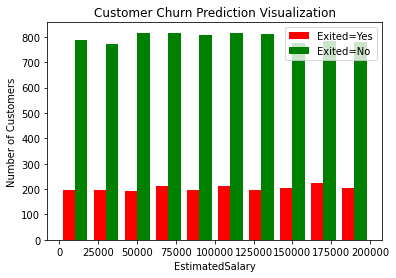

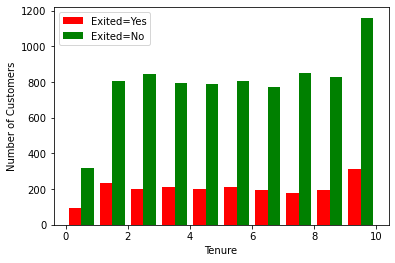

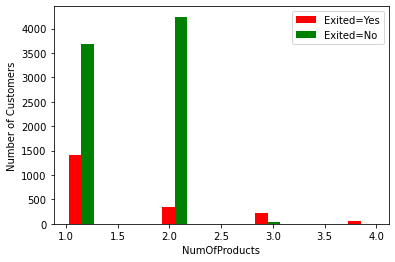

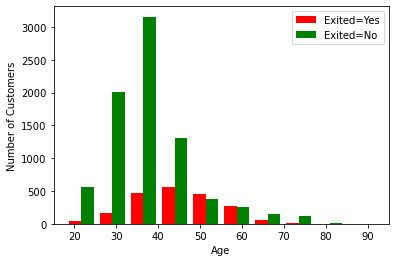

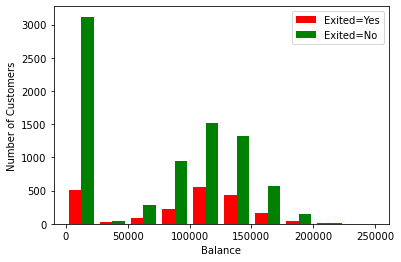

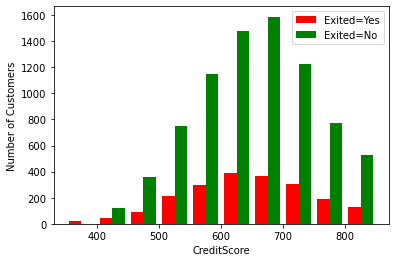

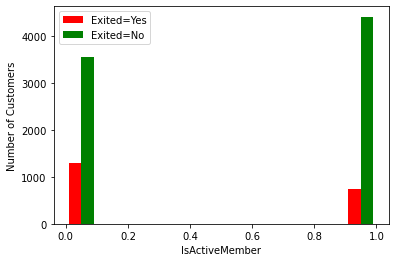

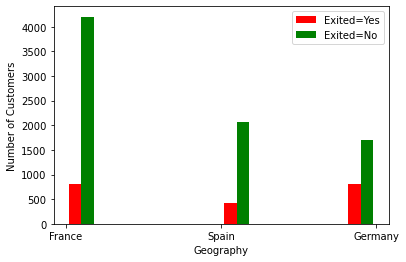

In [14]:
EstimatedSalary_Exited_no=df[df['Exited']==0].EstimatedSalary
EstimatedSalary_Exited_yes=df[df['Exited']==1].EstimatedSalary
tenur_Exited_no=df[df['Exited']==0].Tenure
tenur_Exited_yes=df[df['Exited']==1].Tenure
NumOfProducts_Exited_no=df[df['Exited']==0].NumOfProducts
NumOfProducts_Exited_yes=df[df['Exited']==1].NumOfProducts
Age_Exited_no=df[df['Exited']==0].Age
Age_Exited_yes=df[df['Exited']==1].Age
Balance_Exited_no=df[df['Exited']==0].Balance
Balance_Exited_yes=df[df['Exited']==1].Balance
CreditScore_Exited_no=df[df['Exited']==0].CreditScore
CreditScore_Exited_yes=df[df['Exited']==1].CreditScore
IsActiveMember_Exited_no=df[df['Exited']==0].IsActiveMember
IsActiveMember_Exited_yes=df[df['Exited']==1].IsActiveMember
Geography_Exited_no=df[df['Exited']==0].Geography
Geography_Exited_yes=df[df['Exited']==1].Geography

plt.title("Customer Churn Prediction Visualization")

plt.xlabel("EstimatedSalary")
plt.ylabel("Number of Customers")
plt.hist([EstimatedSalary_Exited_yes,EstimatedSalary_Exited_no], color=['red','green'], label=['Exited=Yes','Exited=No'])
plt.legend()
plt.show()

plt.xlabel("Tenure")
plt.ylabel("Number of Customers")
plt.hist([tenur_Exited_yes,tenur_Exited_no],color=['red','green'],label=['Exited=Yes','Exited=No'])
plt.legend()
plt.show()

plt.xlabel("NumOfProducts")
plt.ylabel("Number of Customers")
plt.hist([NumOfProducts_Exited_yes,NumOfProducts_Exited_no],color=['red','green'],label=['Exited=Yes','Exited=No'])
plt.legend()
plt.show()

plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.hist([Age_Exited_yes,Age_Exited_no],color=['red','green'],label=['Exited=Yes','Exited=No'])
plt.legend()
plt.show()

plt.xlabel("Balance")
plt.ylabel("Number of Customers")
plt.hist([Balance_Exited_yes,Balance_Exited_no],color=['red','green'],label=['Exited=Yes','Exited=No'])
plt.legend()
plt.show()

plt.xlabel("CreditScore")
plt.ylabel("Number of Customers")
plt.hist([CreditScore_Exited_yes,CreditScore_Exited_no],color=['red','green'],label=['Exited=Yes','Exited=No'])
plt.legend()
plt.show()

plt.xlabel("IsActiveMember")
plt.ylabel("Number of Customers")
plt.hist([IsActiveMember_Exited_yes,IsActiveMember_Exited_no],color=['red','green'],label=['Exited=Yes','Exited=No'])
plt.legend()
plt.show()

plt.xlabel("Geography")
plt.ylabel("Number of Customers")
plt.hist([Geography_Exited_yes,Geography_Exited_no],color=['red','green'],label=['Exited=Yes','Exited=No'])
plt.legend()
plt.show()

In [15]:
def print_unique_col_values(df):
    for column in df:
        if(df[column].dtypes=='object'):
            print(f'{column} : {df[column].unique()}')

In [16]:
print_unique_col_values(df)

Geography : ['France' 'Spain' 'Germany']
Gender : ['Female' 'Male']


In [17]:
df['Gender'].replace({'Male':1,'Female':0},inplace=True)

# one-hot encoding

In [18]:
df=pd.get_dummies(data=df,columns=['Geography'])
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [19]:
cols=df.columns
for i in cols:
    print(f'{i} : {df[i].unique()}')

CreditScore : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 

# Standardization

In [20]:
numeric_features = ['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [21]:
cols=df.columns
for i in cols:
    print(f'{i} : {df[i].unique()}')

CreditScore : [-0.32622142 -0.44003595 -1.53679418  0.50152063  2.06388377 -0.05720525
  1.77417405 -2.84048792 -1.54714096  0.346319   -1.26777801 -1.58852806
 -1.80581035 -1.05049572 -0.16067301 -0.35726175  0.02556895 -0.65731824
  0.78088358  0.84296423 -0.15032623 -1.45401997  0.19111736  2.02249666
 -0.760786    1.09128685 -0.82286666 -0.79182633 -2.47835077 -0.61593114
 -1.21604413 -1.00910862 -1.35055222  0.73949648 -1.81615712 -1.66095549
  1.58793208 -0.70905212 -1.84719745 -1.91962488 -0.97806829  1.89833536
  0.09799638  1.29822236  1.84660148 -0.13997946 -1.04014895  0.49117386
 -0.6780118   1.42238367  0.0462625  -0.51246338  0.05660928  0.7705368
 -1.4436732  -0.3779553   0.94643199  0.37735933 -0.98841507 -0.49176983
  1.03955297 -0.7193989   0.87400456  0.10834316  0.25319802  0.90504489
  1.68105307  0.06695605 -0.48142306 -1.36089899  0.13938348  0.28423834
  1.10163363 -2.42661689  0.14973026  1.30856914 -1.11257638 -1.49540708
 -1.62991516  0.01522218  1.0292062   

In [22]:
X=df.drop('Exited',axis='columns')
y=df['Exited']

In [23]:
df.shape

(10000, 13)

In [24]:
X.shape

(10000, 12)

In [25]:
y.shape

(10000,)

# OverSampling and Data Spliting into train,test

In [55]:
from imblearn.over_sampling import SMOTE
oversampler = SMOTE()
X_resampled, y_resampled = oversampler.fit_resample(X, y)
X_train,X_test,y_train,y_test=train_test_split(X_resampled, y_resampled,test_size=0.2,random_state=10)

In [56]:
X_train.shape

(12740, 12)

In [57]:
y_train.shape

(12740,)

In [58]:
X_test.shape

(3186, 12)

In [59]:
y_train.value_counts()

1    6382
0    6358
Name: Exited, dtype: int64

# Model Training

In [60]:
model=keras.Sequential([
    keras.layers.Dense(30,input_shape=(12,),activation='leaky_relu'),
    keras.layers.Dense(40,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=30)

Epoch 1/30
399/399 [==============================] - 2s 3ms/step - loss: 0.4989 - accuracy: 0.7557
Epoch 2/30
399/399 [==============================] - 1s 3ms/step - loss: 0.4265 - accuracy: 0.8006
Epoch 3/30
399/399 [==============================] - 1s 3ms/step - loss: 0.4142 - accuracy: 0.8099
Epoch 4/30
399/399 [==============================] - 1s 3ms/step - loss: 0.4061 - accuracy: 0.8091
Epoch 5/30
399/399 [==============================] - 1s 3ms/step - loss: 0.3998 - accuracy: 0.8124
Epoch 6/30
399/399 [==============================] - 1s 3ms/step - loss: 0.3938 - accuracy: 0.8195
Epoch 7/30
399/399 [==============================] - 1s 3ms/step - loss: 0.3901 - accuracy: 0.8204
Epoch 8/30
399/399 [==============================] - 1s 3ms/step - loss: 0.3857 - accuracy: 0.8204
Epoch 9/30
399/399 [==============================] - 1s 3ms/step - loss: 0.3798 - accuracy: 0.8281
Epoch 10/30
399/399 [==============================] - 1s 3ms/step - loss: 0.3763 - accuracy: 0.8288

# Model Evaluation

In [61]:
model.evaluate(X_test,y_test)

100/100 [==============================] - 0s 3ms/step - loss: 0.3694 - accuracy: 0.8399


[0.36937475204467773, 0.839924693107605]

# Model Prediction

In [62]:
yp=model.predict(X_test)
yp[:5]

100/100 [==============================] - 0s 2ms/step


array([[0.01289911],
       [0.95838803],
       [0.92091393],
       [0.00181428],
       [0.4694859 ]], dtype=float32)

In [63]:
y_test[:20]

145      0
7025     1
12550    1
8798     0
2625     0
2193     0
9457     0
3801     0
435      0
15437    1
6028     1
10828    1
7560     0
4643     1
10286    1
558      0
13973    1
8495     1
6454     0
7460     0
Name: Exited, dtype: int64

In [64]:
y_pred=[]
for i in yp:
    if(i>0.5):
        y_pred.append(1)
    else:
        y_pred.append(0)

In [65]:
y_pred[:20]

[0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0]

# Classification Report

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1605
           1       0.86      0.81      0.83      1581

    accuracy                           0.84      3186
   macro avg       0.84      0.84      0.84      3186
weighted avg       0.84      0.84      0.84      3186



# Confusion Matrix

Text(69.0, 0.5, 'Truth')

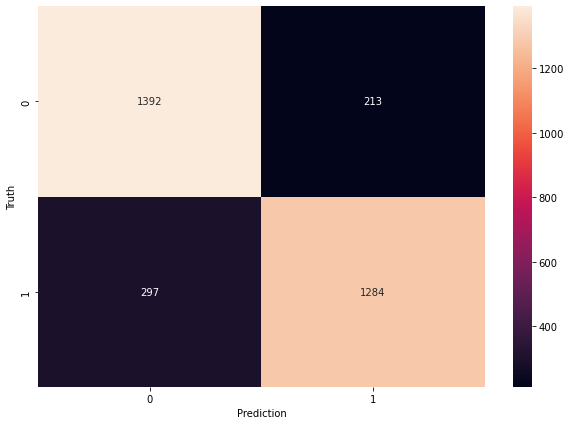

In [73]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

# Our model shows strong potential for generalizability based on the closeness of training and test accuracy (86.04% and 83.99%, respectively). This suggests the model has learned meaningful relationships from the data without overfitting to the training set.


# Precision: Measures the proportion of predicted positives that are actually positive (0.82 for Class 0, 0.86 for Class 1).

# Recall: Measures the proportion of actual positives that are correctly identified (0.87 for Class 0, 0.81 for Class 1).

# F1-score: A balanced measure of precision and recall (0.85 for Class 0, 0.83 for Class 1).

# Overall Accuracy: Measures the proportion of all predictions that are correct (84%).

# These metrics indicate good performance across both classes, demonstrating the model's ability to correctly identify churned and retained customers.